In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
def Show_results(y_test,y_pred_test):
    print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
    print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test, pos_label='Yes')))
    print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test, pos_label='Yes')))
    print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test, pos_label='Yes')))
    print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))  
    cm_test = confusion_matrix(y_test,y_pred_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
    disp.plot()
    plt.show()

<b> 1. Load the dataset and explore the variables.

In [3]:
customer = pd.read_csv('files_for_lab/customer_churn.csv')
diabetes.head()

NameError: name 'diabetes' is not defined

<b> We will try to predict variable <i>Churn</i> using a logistic regression on variables <i>ternure</i>, <i>SeniorCitizen</i>, <i>MonthlyCharges</i>.



In [4]:
customer.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<b> 3. Extract the target variable.


In [5]:
y = customer[['Churn']]

<b> 4. Extract the independent variables and scale them.


In [6]:
X = customer[['tenure','SeniorCitizen','MonthlyCharges']]
X.head()

,tenure,SeniorCitizen,MonthlyCharges
0,1,0,29.85
1,34,0,56.95
2,2,0,53.85
3,45,0,42.30
4,2,0,70.70


<b> 5. Build the logistic regression model.


In [7]:
# here we start scaling, so need to do train-test-split before
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # default test_size values is 0.2

In [8]:
# all features are numeric, so no need to split into _num and _cat
transformer = StandardScaler()
transformer.fit(X_train)
X_train_scaled_np = transformer.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=X.columns)
# because this is the only tranformation we apply to the numerics, (there are no categorical features in the df)
# we can immediately transform the X_test as well
X_test_scaled_np = transformer.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled_np , columns=X.columns)
X_train_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges
0,-0.340191,-0.435476,-0.514314
1,0.883210,2.296336,0.017840
2,-1.196572,-0.435476,-0.819594
3,1.168670,-0.435476,-1.483535
4,-0.829552,-0.435476,0.658427


In [9]:
lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train_scaled, y_train)

/home/jzar/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

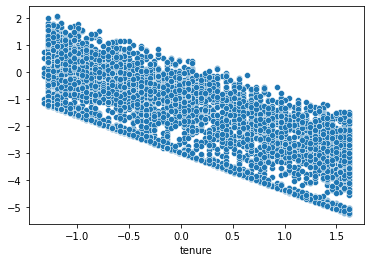

In [10]:
logits = np.log(lr.predict_proba(X_train_scaled)[:,1]/(1-lr.predict_proba(X_train_scaled)[:,1]))
sns.scatterplot(y = logits,x = X_train_scaled['tenure']);
plt.show()

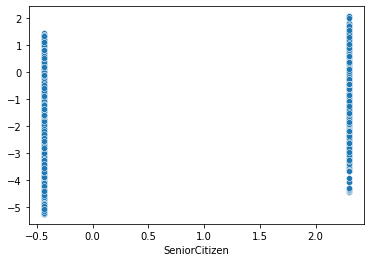

In [11]:
sns.scatterplot(y = logits,x = X_train_scaled['SeniorCitizen']);
plt.show()

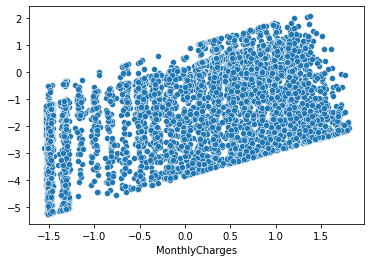

In [12]:
sns.scatterplot(y = logits,x = X_train_scaled['MonthlyCharges']);
plt.show()

<b> 6. Evaluate the model.


In [13]:
count_classes = diabetes['Churn'].value_counts()
print(count_classes)
sns.countplot(x = 'Churn', data = customer);
plt.show()

NameError: name 'diabetes' is not defined

In [14]:
print("The class imbalance ratio is: {:.2f}".format(count_classes[0]-count_classes[1]/(count_classes[0]+count_classes[1])))

NameError: name 'count_classes' is not defined

The accuracy in the TEST set is: 0.78
The precision in the TEST set is: 0.61
The recall in the TEST set is: 0.46
The F1 in the TEST set is: 0.52
The Kappa in the TEST set is: 0.38


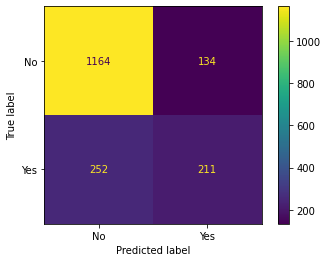

In [15]:
y_pred_test = lr.predict(X_test_scaled)
Show_results(y_test,y_pred_test)

<b> 7. Even a simple model will give us more than 70% accuracy. Why?

Because we have a big unbalanced data that predicts No very accurate

<b> 8. <b>Synthetic Minority Oversampling TEchnique (SMOTE)</b> is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply <i>imblearn.over_sampling.SMOTE</i> to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [16]:
sm = SMOTE(random_state=100,k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

The accuracy in the TEST set is: 0.72
The precision in the TEST set is: 0.48
The recall in the TEST set is: 0.72
The F1 in the TEST set is: 0.57
The Kappa in the TEST set is: 0.38


/home/jzar/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


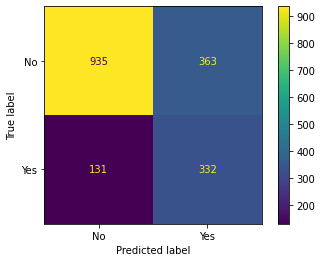

In [17]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_test = lr.predict(X_test_scaled)

Show_results(y_test,y_pred_test)

I can see that it has improved on the recall. Because we get less false negatives